In [1]:
import numpy as np 
import pandas as pd 
import numpy as np
import cv2 
import os 
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [2]:
import pathlib
data_dir=pathlib.Path('data')

In [3]:
def laod_images_opencv_extisions(path):
    ext = [".jpg",".gif",".png",".tga",".webp"]   # Add image formats here
    files = []
    images = []
    [files.extend(data_dir.glob(path + '/*' + e)) for e in ext]
    return files

In [4]:

classes= [i.split('\\')[-1] for i in [x[0] for x in os.walk(str(data_dir)+'/Train')][1:]]
classes

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [5]:
len(classes)

9

In [6]:
image_dir={}
for i in classes:
    image_dir[i]=laod_images_opencv_extisions('Train/'+i)

In [7]:
test_dir={}
for i in classes:
    test_dir[i]=laod_images_opencv_extisions('Test/'+i)

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def get_dataFrame(dic):
    x,y=[],[]
    for imageName, imagePaths in dic.items():
        for img in imagePaths:
            try:
                x.append(img)
                y.append(imageName)
            except:
                continue 
            
    dataFrame = pd.DataFrame({
        'filename': x,
        'category': y
    })
    dataFrame['category'] = dataFrame['category']
    
    dataFrame['category']=le.fit_transform(dataFrame['category'])
    dataFrame['category'] = dataFrame['category'].astype('string')
    dataFrame['filename'] = dataFrame['filename'].astype('string')
    dataFrame=dataFrame.sample(frac=1)
    #dataFrame= dataFrame.reset_index()
    return dataFrame

In [9]:
train_data_frame=pd.DataFrame(get_dataFrame(image_dir))
train_data_frame=train_data_frame.reset_index()
train_data_frame.head()

,index,filename,category
0,43,data\Train\actinic keratosis\ISIC_0028063.jpg,0
1,76,data\Train\actinic keratosis\ISIC_0030242.jpg,0
2,685,data\Train\melanoma\ISIC_0000469.jpg,3
3,152,data\Train\basal cell carcinoma\ISIC_0025383.jpg,1
4,27,data\Train\actinic keratosis\ISIC_0027254.jpg,0


In [10]:
test_data_frame=pd.DataFrame(get_dataFrame(test_dir))
test_data_frame=test_data_frame.reset_index()
test_data_frame.head()

,index,filename,category
0,18,data\Test\basal cell carcinoma\ISIC_0024345.jpg,1
1,4,data\Test\actinic keratosis\ISIC_0024511.jpg,0
2,20,data\Test\basal cell carcinoma\ISIC_0024403.jpg,1
3,22,data\Test\basal cell carcinoma\ISIC_0024431.jpg,1
4,105,data\Test\squamous cell carcinoma\ISIC_0024372...,7


In [25]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(train_data_frame,random_state=11, test_size=0.2)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [12]:
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

In [26]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
   
    x_col='filename',
    y_col='category',

    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 1791 validated image filenames belonging to 9 classes.


In [27]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
     
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size
)


Found 448 validated image filenames belonging to 9 classes.


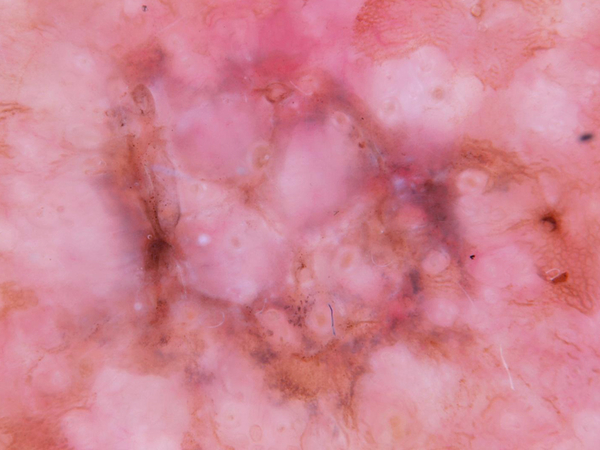

In [15]:
import PIL
PIL.Image.open(str(train_data_frame['filename'][1]))

Found 1 validated image filenames belonging to 1 classes.


C:\Users\Mahmoud S.AbdelRahma\AppData\Local\Temp\ipykernel_14000\2866951001.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


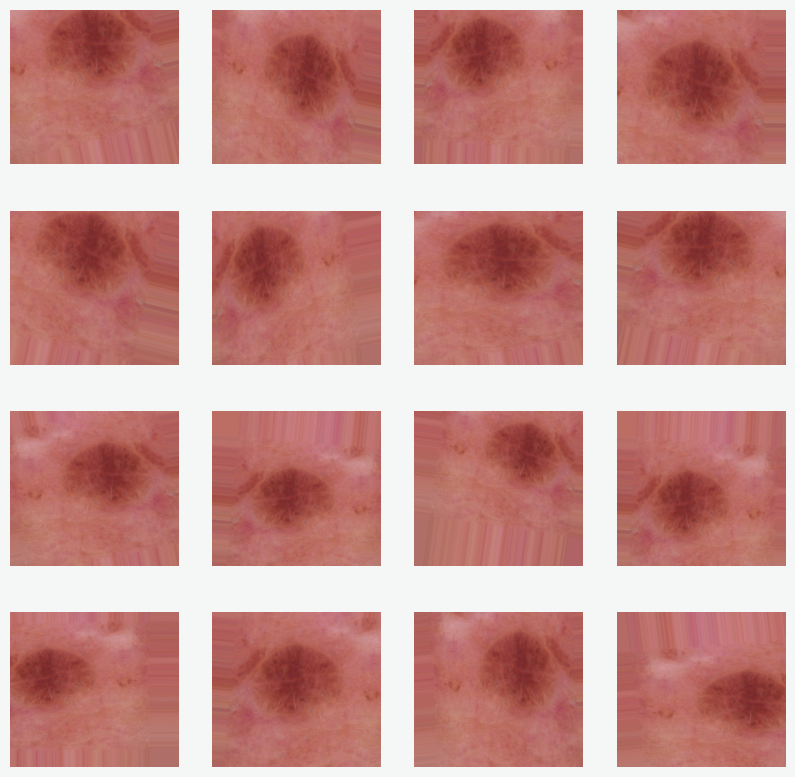

In [16]:
import matplotlib.pyplot as plt
def data_argumentation_show(n, grid_size):

    sample_data = train_datagen.flow_from_dataframe(
            (train_df.sample(n)),
           
            x_col = 'filename',
            y_col = 'category',
            target_size = (224, 244),
            class_mode = 'categorical')
  
  #subplot grid 
    fig = plt.figure(figsize = (10,10))
    fig.patch.set_facecolor('#f5f6f6')
    for i in range(0,grid_size*grid_size):
        plt.subplot(grid_size,grid_size, i+1)
        for x,y in sample_data:
            img = x[0]
            plt.imshow(img)
            plt.axis('off')
            break
            plt.tight_layout()
            del img
    fig.show()
data_argumentation_show(1,4)


In [17]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model


In [18]:


image_size = 224
input_shape = (image_size, image_size, 3)



pre_trained_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')
    
pre_trained_model.trainable = False

add_model = Sequential()
add_model.add(pre_trained_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(len(classes), 
                    activation='softmax'))

model = add_model
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-4, 
                                       momentum=0.9),
              metrics=['accuracy'])
model.summary()


In [19]:
history1 = model.fit_generator(
    train_generator,
    epochs=2,# <----- increase it for 20
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    
)

In [20]:
import cv2
import matplotlib.pylab as plt
def pip_line(image_path):
    image=cv2.imread(str(image_path))
    imageee=cv2.resize(image,(224,224))
    imageee=imageee/255.0
    plt.imshow(imageee)
    res= model.predict(np.array([imageee]))
    return le.classes_[np.argmax(res)] 
print(pip_line(r'/kaggle/input/melenoma-cnn-dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg'))

In [21]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
 
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(9, activation='softmax')
  ])

  model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [22]:
import warnings
warnings.filterwarnings("ignore")

custome_model=create_model()
custome_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [23]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

def myCallbacks(weights_name):
    learning_rate_reduction = ReduceLROnPlateau(
        monitor='val_accuracy', 
        patience=2, 
        verbose=1, 
        factor=0.2, 
        min_lr=0.0001,
        )
    es=EarlyStopping(
        monitor="val_accuracy",
        min_delta=0.01,
        patience=8,
        verbose=1,
        mode="auto",
    )
    model_cp=ModelCheckpoint(
        filepath=str(weights_name)+".h5",
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
    callbacks = [es,model_cp, learning_rate_reduction]
    return callbacks

In [28]:
history = custome_model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=myCallbacks('custome_model')
)

Epoch 1/10
111/111 [==============================] - ETA: 0s - loss: 1.2454 - accuracy: 0.5448
Epoch 1: val_accuracy improved from -inf to 0.51562, saving model to custome_model.h5
111/111 [==============================] - 31s 280ms/step - loss: 1.2454 - accuracy: 0.5448 - val_loss: 1.4136 - val_accuracy: 0.5156 - lr: 1.0000e-04
Epoch 2/10
111/111 [==============================] - ETA: 0s - loss: 1.2309 - accuracy: 0.5679
Epoch 2: val_accuracy improved from 0.51562 to 0.59152, saving model to custome_model.h5
111/111 [==============================] - 31s 277ms/step - loss: 1.2309 - accuracy: 0.5679 - val_loss: 1.1480 - val_accuracy: 0.5915 - lr: 1.0000e-04
Epoch 3/10
111/111 [==============================] - ETA: 0s - loss: 1.2240 - accuracy: 0.5634
Epoch 3: val_accuracy did not improve from 0.59152
111/111 [==============================] - 30s 268ms/step - loss: 1.2240 - accuracy: 0.5634 - val_loss: 1.2464 - val_accuracy: 0.5714 - lr: 1.0000e-04
Epoch 4/10
111/111 [=============

In [31]:
model_json = custome_model.to_json()
with open("custome_model.json", "w") as json_file:
    json_file.write(model_json)

In [32]:
import joblib
joblib.dump(le,'lables')

['lables']